## Open in Jupiter Lab!

## Historical data

In [1]:
import finlab_crypto

ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '4h')
ohlcv.head()

All caught up..!


,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4261.48,4349.99,4261.32,4349.99,82.088865,1.502957e+12,3.531943e+05,334.0,64.013727,275647.421911,0.0
2017-08-17 08:00:00+00:00,4333.32,4485.39,4333.32,4427.30,63.619882,1.502971e+12,2.825012e+05,248.0,58.787633,261054.051154,0.0
2017-08-17 12:00:00+00:00,4436.06,4485.39,4333.42,4352.34,174.562001,1.502986e+12,7.742388e+05,858.0,125.184133,555419.758061,0.0
2017-08-17 16:00:00+00:00,4352.33,4354.84,4200.74,4325.23,225.109716,1.503000e+12,9.652911e+05,986.0,165.036363,707808.200922,0.0
2017-08-17 20:00:00+00:00,4307.56,4369.69,4258.56,4285.08,249.769913,1.503014e+12,1.079545e+06,1001.0,203.226685,878286.968557,0.0


## Trading Strategy

In [2]:
@finlab_crypto.Strategy(n1=20, n2=60)
def sma_strategy(ohlcv):
  n1 = sma_strategy.n1
  n2 = sma_strategy.n2
  
  sma1 = ohlcv.close.rolling(int(n1)).mean()
  sma2 = ohlcv.close.rolling(int(n2)).mean()
  return (sma1 > sma2), (sma1 < sma2)

## Backtesting

In [4]:
vars =  {'n1': 20, 'n2': 60}
portfolio = sma_strategy.backtest(ohlcv, vars, freq='4h', plot=True)

## Optiimization

  0%|          | 0/324 [00:00<?, ?it/s]

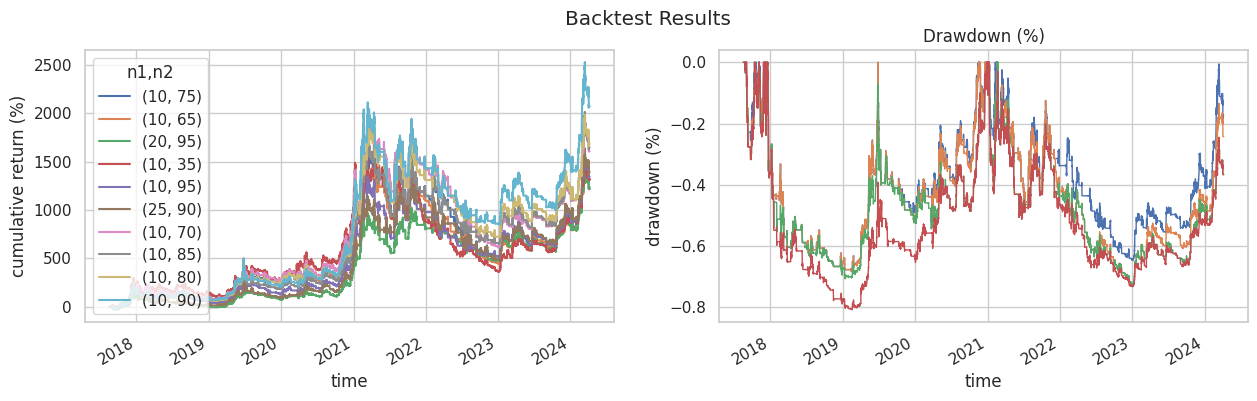

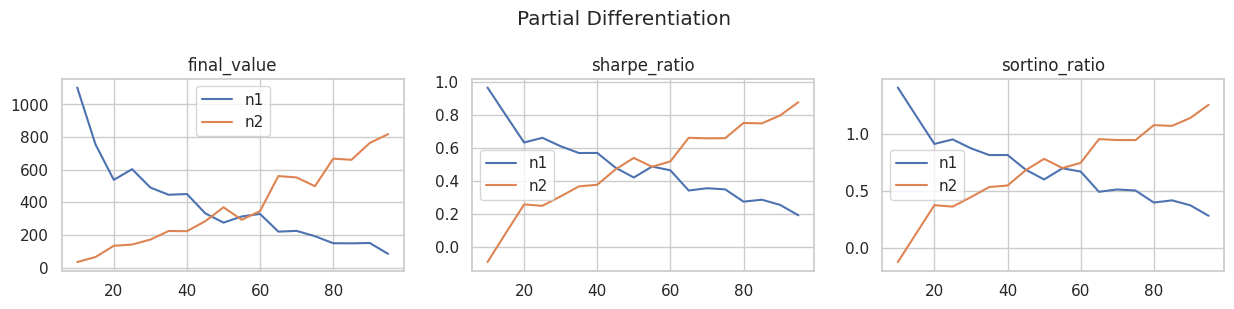

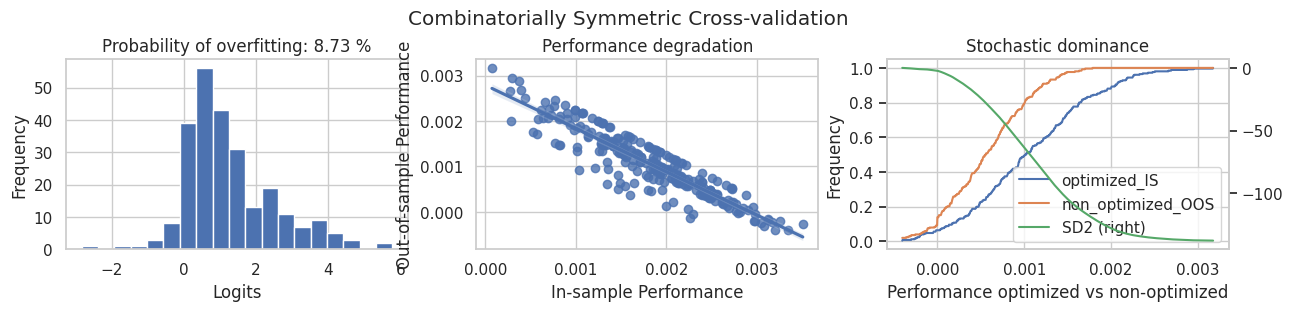

Output()

In [5]:
import numpy as np
vars = {
  'n1': np.arange(10, 100, 5), 
  'n2': np.arange(10, 100, 5)
}
portfolio = sma_strategy.backtest(ohlcv, vars, freq='4h', plot=True)